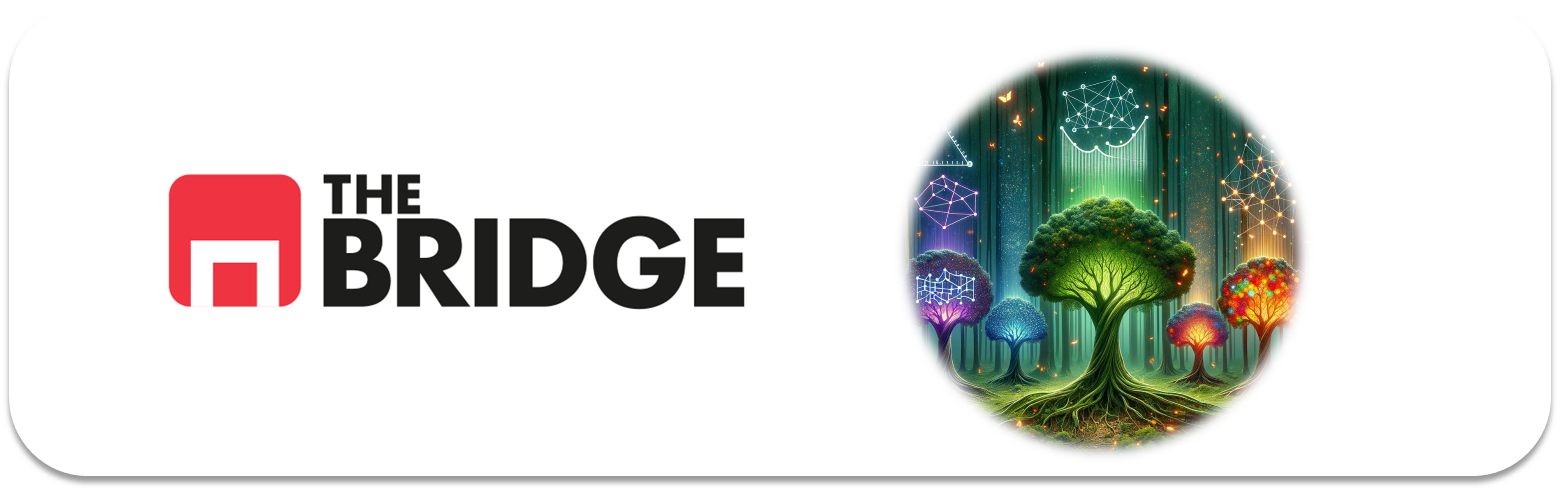

## PRACTICA OBLIGATORIA: **Arboles de Decisión y Ajuste de hiperparámetros**

* La práctica obligatoria de esta unidad consiste en encontrar el mejor modelo para resolver un problema de predicción de si los destinatarios de una campaña de marketing adquirirán un producto concreto. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

### Descripción

En el directorio data encontrarás un dataset que contiene datos relacionados con campañas de marketing directo de una institución bancaria portuguesa (es el dataset "Bank Marketing" de la UCI Machine Learning Repository). Los datos se recopilaron de campañas de marketing telefónico, donde el objetivo principal era predecir si el cliente se suscribiría a un depósito a plazo.

La práctica consiste en completar el proceso de creación de un modelo basado en árboles de decisión que permita predecir si un cliente (dadas unas características similares a las del dataset) "comprará" el depósito a plazo. Sigue los pasos necesarios de un proceso de ML para crear el modelo, optimizar sus hiperparámetros, comparar los resultados de esa optimización con una regresión logística (sin optimizar, con sus hiperparámetros por defecto) y finalmente evaluarlo contra test y hacer una pequeña valoración del resultado obtenido.

Tendrás que hacer la limpieza, split, minieda, selección, tratamiento, primeros entrenamientos, optimización, comparación y evaluación según tu mejor criterio. Eso sí, es obligatorio:
- Identificar el target y analizar su distribución
- Realizar una optimización de hiperparámetros, escogiendo un grid medianemante razonado
- Comparar con el modelo baseline
- Evaluar contra test

AYUDA: La dirección del banco nos proporciona estas notas (en inglés):

 
   **bank client data:**  
   1 - age (numeric)  
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services")   
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)  
   4 - education (categorical: "unknown","secondary","primary","tertiary")  
   5 - default: has credit in default? (binary: "yes","no")  
   6 - balance: average yearly balance, in euros (numeric)   
   7 - housing: has housing loan? (binary: "yes","no")  
   8 - loan: has personal loan? (binary: "yes","no")   

   **related with the last contact of the current campaign:**  
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular")   
  10 - day: last contact day of the month (numeric)  
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")  
  12 - duration: last contact duration, in seconds (numeric)    

   **other attributes:**  
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)  
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)  
  15 - previous: number of contacts performed before this campaign and for this client (numeric)  
  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  

In [132]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
import bootcampviztools

In [133]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [134]:
#- Identificar el target y analizar su distribución

df_marketing = pd.read_csv("./data/bank-full.csv", sep=";")


In [135]:
df_marketing

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [136]:
df_marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [137]:
def sugerir_tipo_variable(df, umbral_categoria, umbral_continua):

    """
    Esta función sugiere el tipo de cada columna del DataFrame basándose en la cardinalidad
    y en el porcentaje de valores únicos en relación al tamaño del DataFrame. Los tipos de
    variables sugeridos son: "Binaria", "Categórica", "Numérica Discreta" o "Numérica Continua".
    
    Parámetros:
    -----------
    df : pandas.DataFrame
        El DataFrame sobre el que se realizará la clasificación de tipos de variables.
    
    umbral_categoria : int, opcional (por defecto 10)
        El umbral de cardinalidad. Si una columna tiene menos valores únicos que este
        umbral, se considera categórica. Si tiene más, se considera numérica.

    umbral_continua : float, opcional (por defecto 0.90)
        Umbral de porcentaje de cardinalidad sobre el tamaño del DataFrame. Si el
        porcentaje de valores únicos en la columna es superior o igual a este umbral
        y la cardinalidad supera el umbral de categorías, la variable se considera 
        "Numérica Continua". En caso contrario, se considera "Numérica Discreta".

    Retorna:
    --------
    pandas.DataFrame:
        Un DataFrame con dos columnas: "nombre_variable" y "tipo_sugerido", que contiene 
        el nombre de la columna original y el tipo de variable sugerido.
    """
    # Inicializar una lista para almacenar el resultado
    sugerencias = []

    # Recorrer cada columna del DataFrame
    for col in df.columns:
        # Calcular la cardinalidad (número de valores únicos)
        cardinalidad = df[col].nunique()
        # Calcular el porcentaje de cardinalidad
        porcentaje_cardinalidad = (cardinalidad / len(df)) * 100
        
        # Determinar el tipo sugerido
        if cardinalidad == 2:
            tipo_sugerido = "Binaria"
        elif cardinalidad < umbral_categoria:
            tipo_sugerido = "Categórica"
        elif porcentaje_cardinalidad >= umbral_continua:
            tipo_sugerido = "Numerica Continua"
        else:
            tipo_sugerido = "Numerica Discreta"
        
        # Añadir la sugerencia a la lista
        sugerencias.append({
            'nombre_variable': col,
            'tipo_sugerido': tipo_sugerido
        })
    
    # Convertir la lista de sugerencias en un DataFrame
    resultado_df = pd.DataFrame(sugerencias)
    
    return resultado_df

In [138]:
sugerir_tipo_variable(df_marketing,13, 0.90)

,nombre_variable,tipo_sugerido
0,age,Numerica Discreta
1,job,Categórica
2,marital,Categórica
3,education,Categórica
4,default,Binaria
5,balance,Numerica Continua
6,housing,Binaria
7,loan,Binaria
8,contact,Categórica
9,day,Numerica Discreta


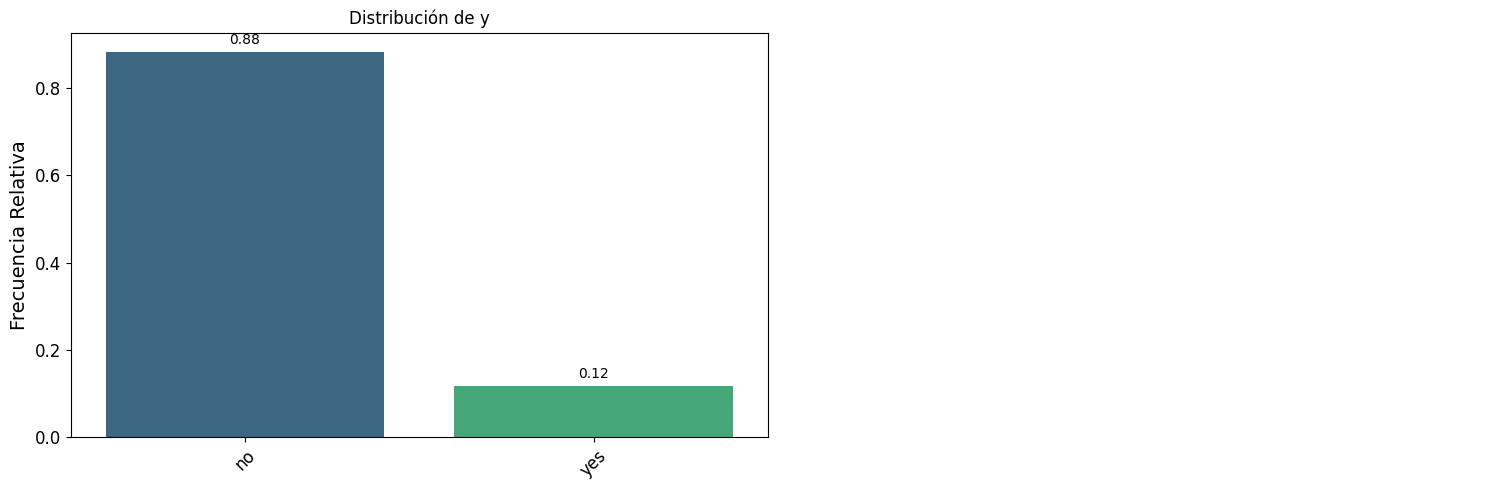

In [139]:
bootcampviztools.pinta_distribucion_categoricas(df_marketing, "y", relativa=True, mostrar_valores=True)

In [140]:
X_train, X_test = train_test_split(df_marketing, test_size=0.20, random_state=42)

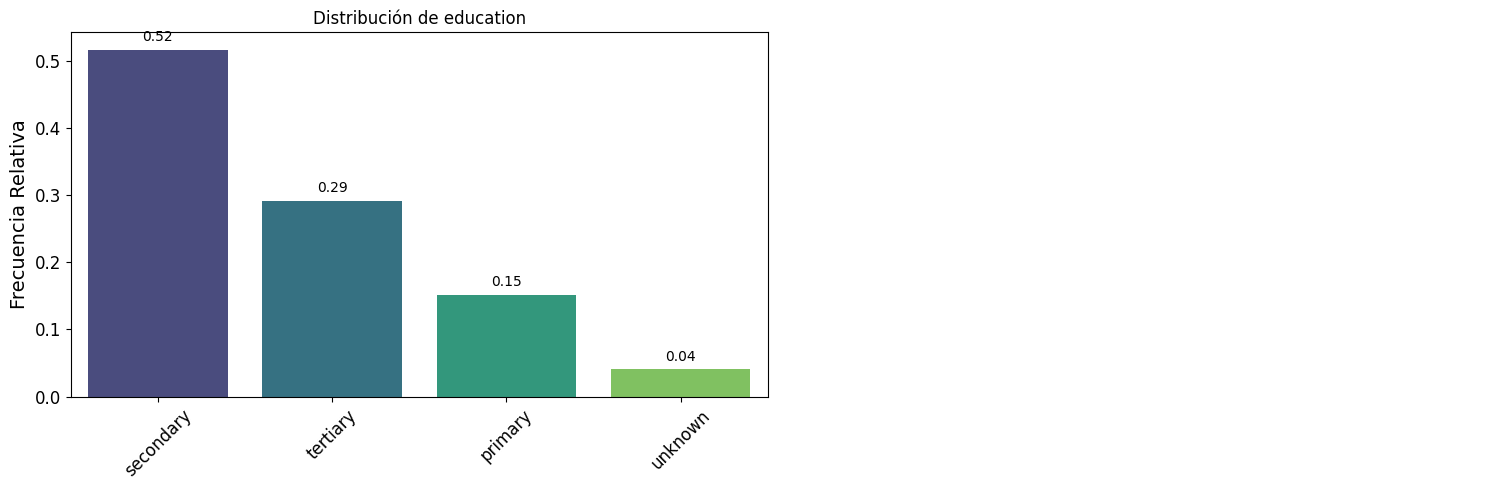

In [141]:
bootcampviztools.pinta_distribucion_categoricas(X_train, ["education"], relativa=True, mostrar_valores=True)

In [161]:

cat= [["unknown","primary","secondary","tertiary"],["no","yes"]]
ordinal_encoder = OrdinalEncoder()
X_train[["educaction_cat","target_cat","job_cat","marital_cat","default_cat","housing_cat","loan_cat","contact_cat","month_cat","poutcome_cat"]] = ordinal_encoder.fit_transform(X_train[["education","y","job","marital","default","housing","loan","contact","month","poutcome"]])
X_test[["educaction_cat","target_cat","job_cat","marital_cat","default_cat","housing_cat","loan_cat","contact_cat","month_cat","poutcome_cat"]] = ordinal_encoder.transform(X_test[["education","y","job","marital","default","housing","loan","contact","month","poutcome"]])

In [156]:
X_train

,age,job,marital,education,default,balance,housing,loan,contact,day,...,educaction_cat,target_cat,job_cat,marital_cat,default_cat,housing_cat,loan_cat,contact_cat,month_cat,poutcome_cat
3344,41,blue-collar,married,primary,no,849,yes,no,unknown,15,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,2.0,8.0,3.0
17965,49,technician,married,primary,no,1415,yes,no,cellular,30,...,0.0,0.0,9.0,1.0,0.0,1.0,0.0,0.0,5.0,3.0
18299,42,admin.,married,secondary,no,3842,no,no,cellular,31,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0,3.0
10221,37,management,single,tertiary,no,-119,yes,no,unknown,11,...,2.0,0.0,4.0,2.0,0.0,1.0,0.0,2.0,6.0,3.0
32192,56,blue-collar,married,primary,no,3498,no,no,cellular,15,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,44,housemaid,single,primary,no,1059,no,no,unknown,18,...,0.0,1.0,3.0,2.0,0.0,0.0,0.0,2.0,6.0,3.0
44732,23,student,single,tertiary,no,508,no,no,cellular,8,...,2.0,0.0,8.0,2.0,0.0,0.0,0.0,0.0,11.0,0.0
38158,34,technician,divorced,tertiary,no,1317,yes,no,cellular,15,...,2.0,0.0,9.0,0.0,0.0,1.0,0.0,0.0,8.0,3.0
860,33,retired,married,secondary,no,165,no,no,unknown,7,...,1.0,0.0,5.0,1.0,0.0,0.0,0.0,2.0,8.0,3.0


In [163]:
target = ["target_cat"]
features_cat_originales =["job","marital","default","housing","loan","contact","month","poutcome","educaction"]
features_cat = ["job_cat","marital_cat","default_cat","housing_cat","loan_cat","contact_cat","month_cat","poutcome_cat","educaction_cat"]
features_nun = ["age","balance","day","duration","campaign","pdays","previous"]
features = features_cat+ features_nun


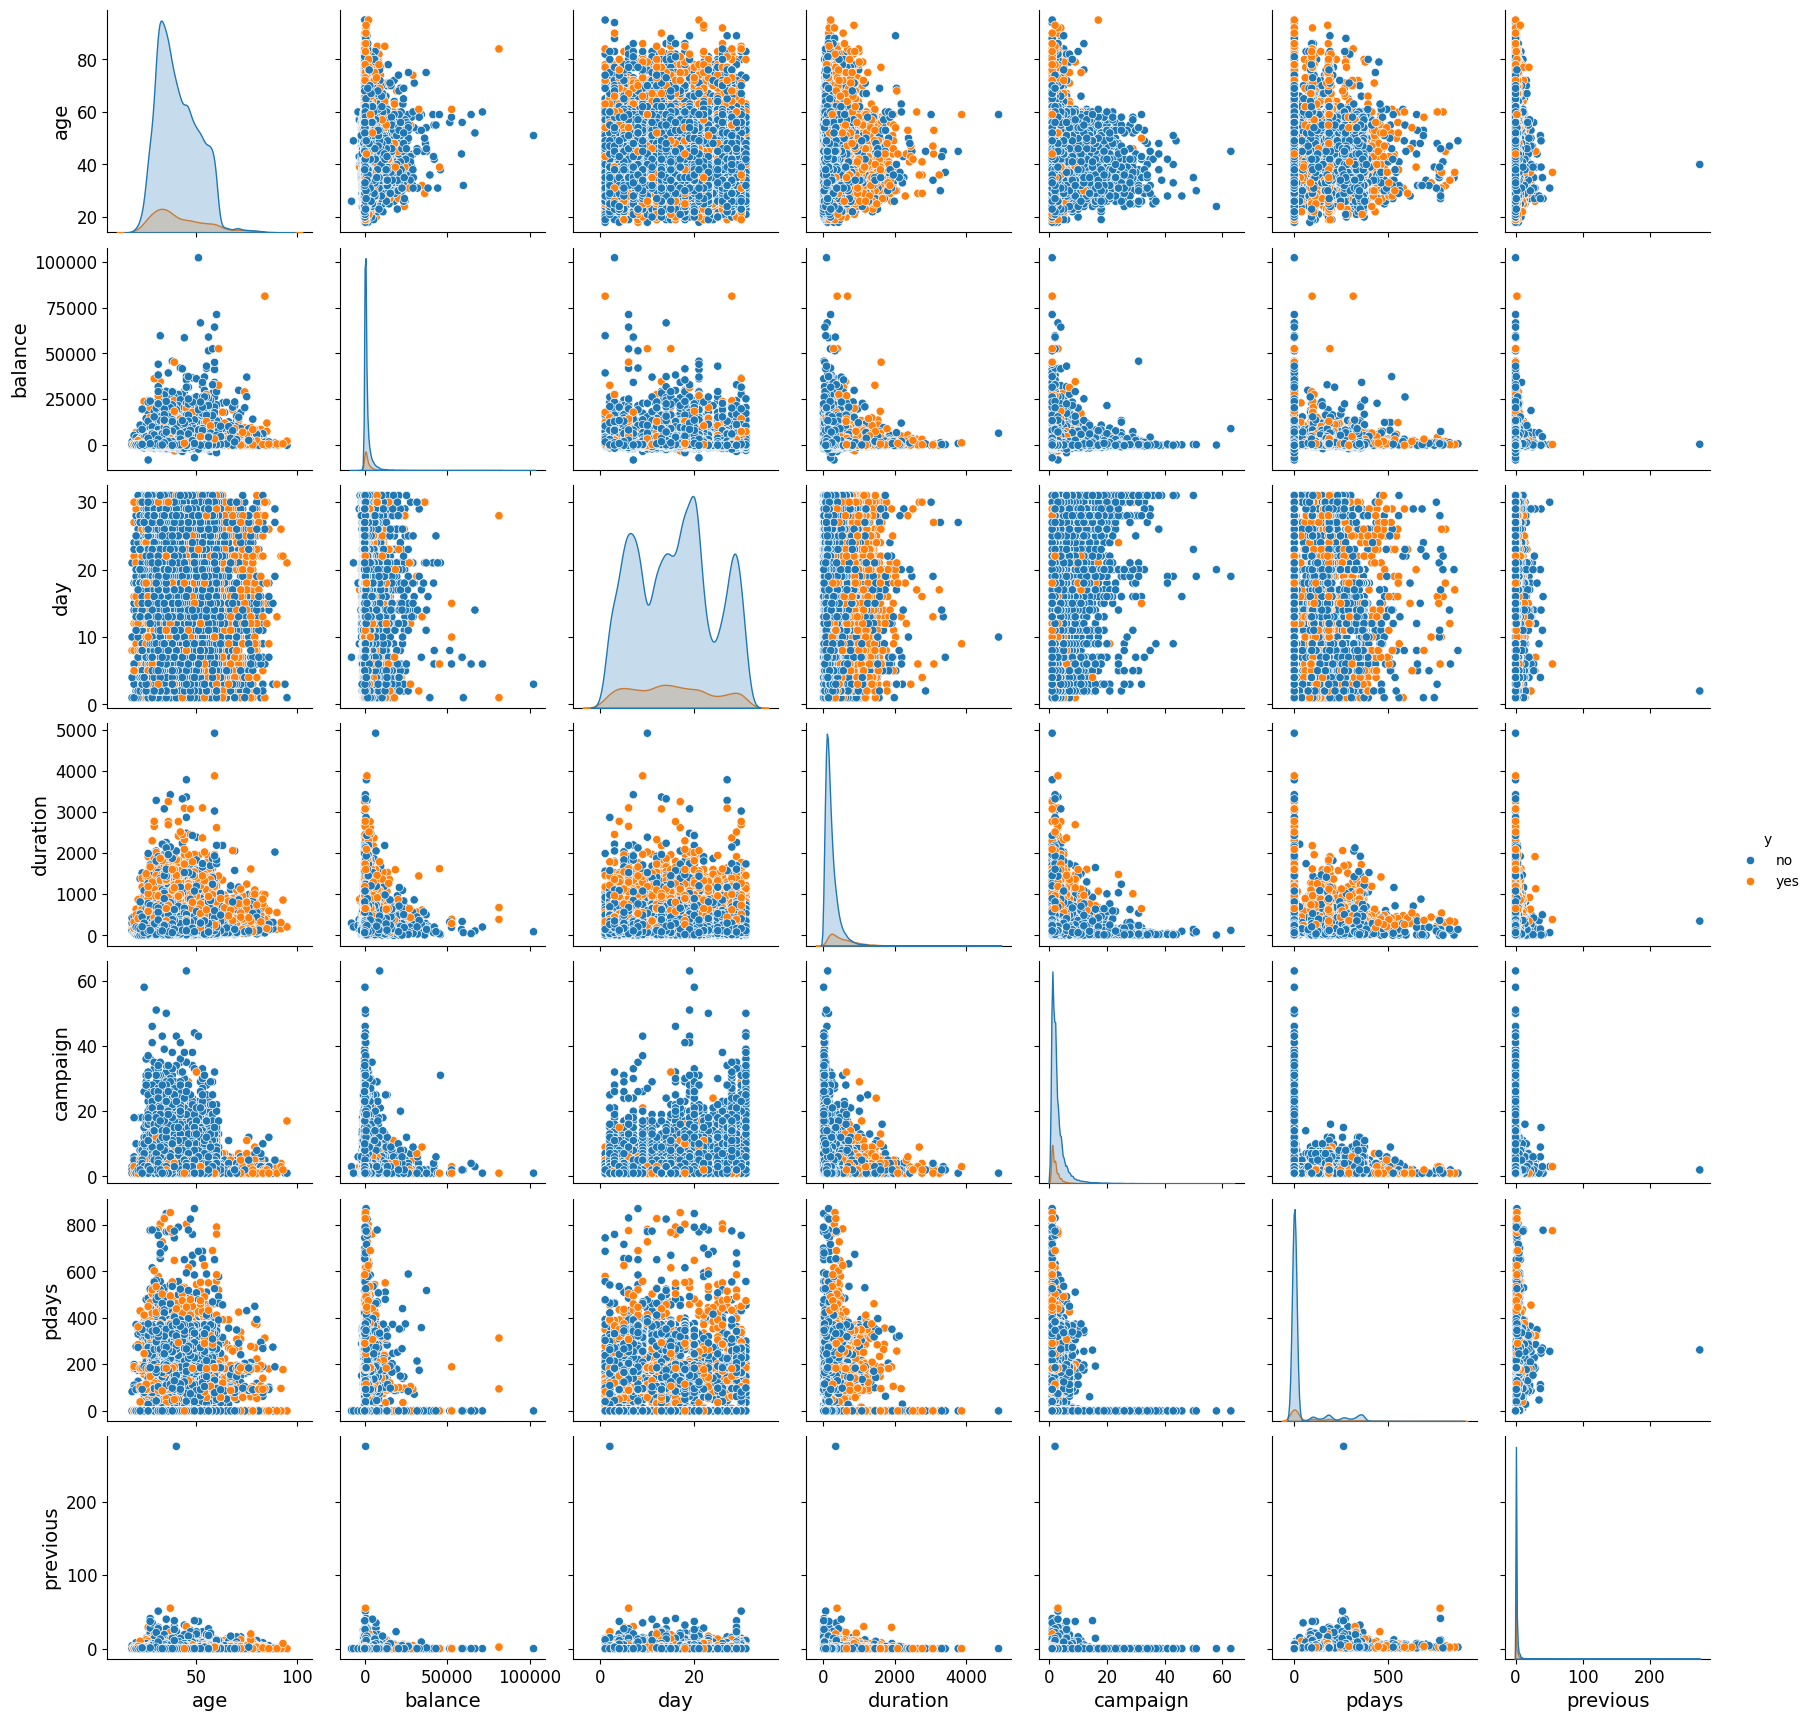

In [164]:
sns.pairplot(X_train[features_nun +["y"]],hue='y')

[Text(0.5, 0.9166666666666666, 'x[12] <= 510.5\ngini = 0.205\nsamples = 36168\nvalue = [31970, 4198]'),
 Text(0.25, 0.75, 'x[6] <= 9.5\ngini = 0.141\nsamples = 32112\nvalue = [29670, 2442]'),
 Text(0.375, 0.8333333333333333, 'True  '),
 Text(0.125, 0.5833333333333334, 'x[9] <= 60.5\ngini = 0.123\nsamples = 31184\nvalue = [29137.0, 2047.0]'),
 Text(0.0625, 0.4166666666666667, 'x[14] <= 8.5\ngini = 0.111\nsamples = 30565\nvalue = [28763, 1802]'),
 Text(0.03125, 0.25, 'x[12] <= 313.5\ngini = 0.075\nsamples = 25428\nvalue = [24436, 992]'),
 Text(0.015625, 0.08333333333333333, 'gini = 0.051\nsamples = 21453\nvalue = [20892, 561]'),
 Text(0.046875, 0.08333333333333333, 'gini = 0.193\nsamples = 3975\nvalue = [3544, 431]'),
 Text(0.09375, 0.25, 'x[7] <= 1.5\ngini = 0.266\nsamples = 5137\nvalue = [4327, 810]'),
 Text(0.078125, 0.08333333333333333, 'gini = 0.161\nsamples = 4398\nvalue = [4010, 388]'),
 Text(0.109375, 0.08333333333333333, 'gini = 0.49\nsamples = 739\nvalue = [317, 422]'),
 Text(0

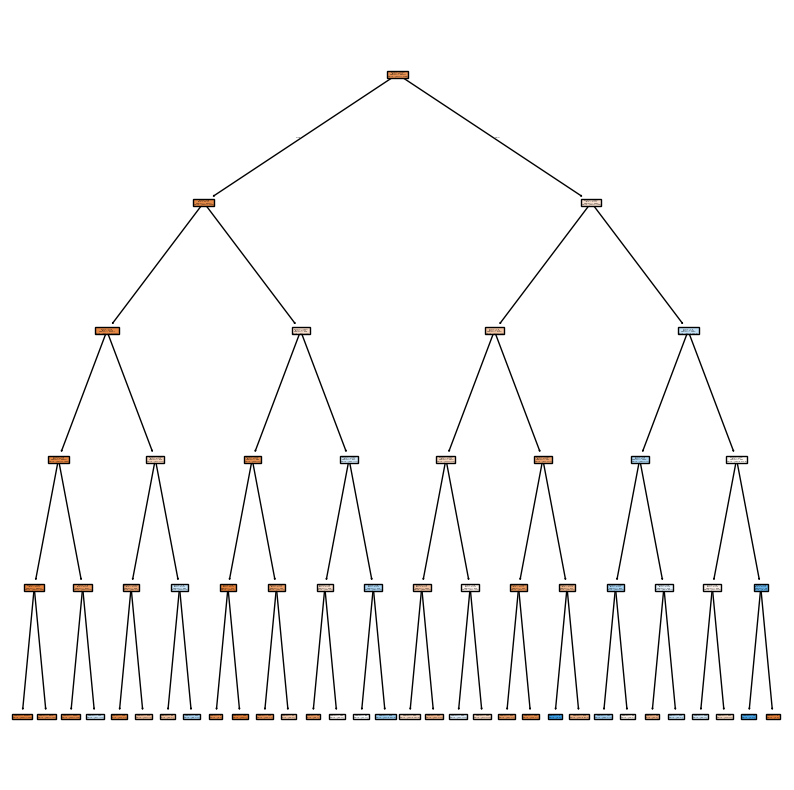

In [168]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
X = X_train[features]
y = X_train[target]

tree_clf = DecisionTreeClassifier(max_depth=5,
                                  random_state=42)

tree_clf.fit(X, y)

plt.figure(figsize=(10,10))
plot_tree(tree_clf,
               
               filled = True)


In [169]:
from sklearn.metrics import median_absolute_error, root_mean_squared_error, mean_absolute_percentage_error
pred_train = tree_clf.predict(X)

print("MAE:", median_absolute_error(y, pred_train))
print("RMSE:", root_mean_squared_error(y, pred_train))
print("R^2:", tree_clf.score(X_train[features], y))

MAE: 0.0
RMSE: 0.31514173159571096
R^2: 0.9006856890068569


In [167]:
X_= X_test[features]
y_=X_test[target]

pred_test = tree_clf.predict(X_)

print("MAE:", median_absolute_error(y_, pred_test))
print("RMSE:", root_mean_squared_error(y_, pred_test))
print("R^2:", tree_clf.score(X_test[features], y_))

MAE: 0.0
RMSE: 0.3251417064469883
R^2: 0.8942828707287405


In [170]:
#Ahora con grid de hiperparametros
from sklearn.model_selection import GridSearchCV
model = DecisionTreeClassifier()
param_grid = {
    'max_depth': [None, 3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

# Ajustar el modelo
grid_search.fit(X, y)

# Ver los mejores hiperparámetros
print(grid_search.best_params_)


{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}
